In [1]:
%load_ext autoreload
%autoreload 2

In [182]:
import os
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt

from matplotlib import colors
from astropy.io import fits

from ics.hxutils import hxramp
from h4rg_analysis import io, ramputils

In [3]:
plt.rcParams['figure.figsize'] = (8,8)

In [4]:
newbaselines = open ('../data/paths/new_baseline_darks_1_9_2022.txt', 'r').read().splitlines()[1:]
bestbaselines = open ('../data/paths/best_ever_baseline_darks_8_21_2022.txt', 'r').read().splitlines()[1:]

In [6]:
pt = io.jhu2tiger ( bestbaselines[1] )

### hxramp

In [7]:
raw = fits.open(pt)

In [9]:
ramp = hxramp.HxRamp( pt )
cds = ramp.cds()

In [70]:
del stack

In [71]:
%%time
stack = ramp.readStack() # IRP-corrected

CPU times: user 35 s, sys: 27.1 s, total: 1min 2s
Wall time: 1min 5s


In [14]:
#\\ %%time
#\\ data = ramp.dataStack (dtype='f4') # raw data frames
#\\ 
#\\ %%time
#\\ ref = ramp.irpStack (dtype='f4') # IRP frames

In [18]:
fstack = stack.reshape(300,-1)

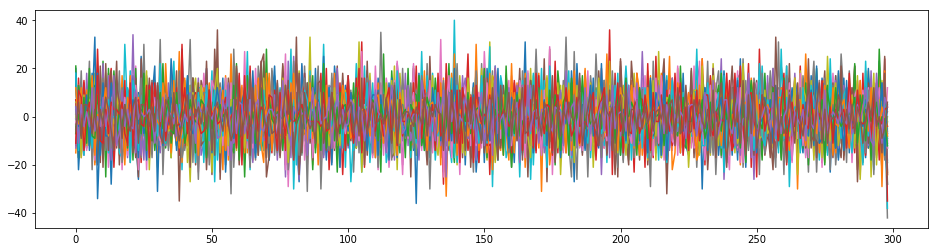

In [34]:
fig = plt.figure (figsize=(16,4))
ax = plt.subplot(111)

steps = np.arange(0, 4096, 4096//5)
for ydx in steps:
    for xdx in steps:
        pixel = stack[:,ydx,xdx]
        plt.plot ( pixel[1:] - pixel[:-1] )

In [164]:
plt.rcParams['font.size'] = 16

In [189]:
ypix,xpix = np.unravel_index(np.argsort(cds.flatten())[-10], cds.shape)
ypix,xpix = (2000,2000)

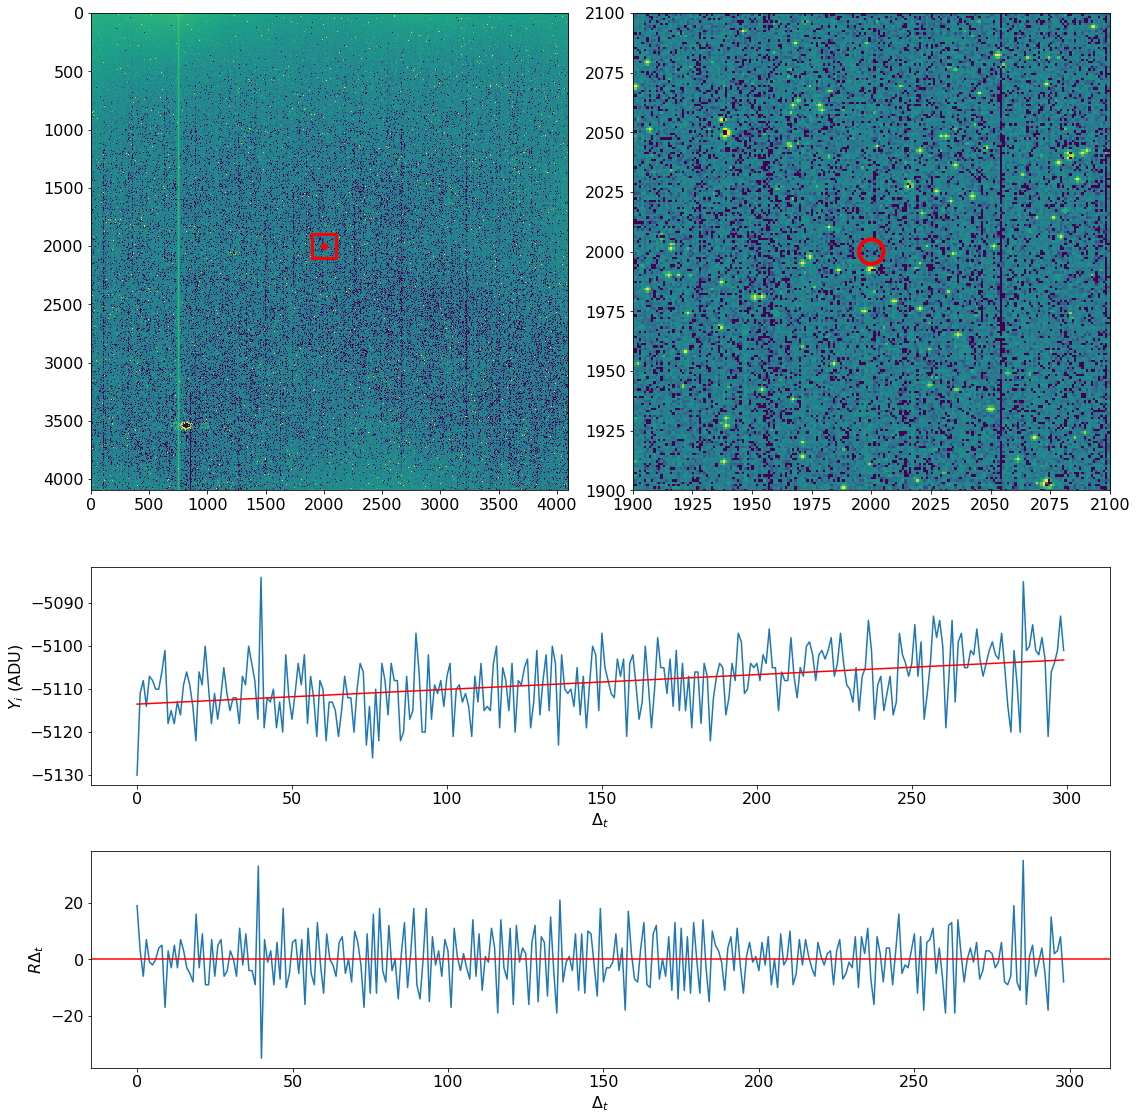

In [190]:
fig = plt.figure ( figsize=(16, 16))
imaxarr = [ plt.subplot2grid ((4,4), (0,ix*2), rowspan=2, colspan=2 ) for ix in range(2) ]
lnaxarr = [ plt.subplot2grid ((4,4), (2+ix,0), colspan=4 ) for ix in range(2) ]

#fig, imaxarr = plt.subplots(1,2,figsize=(16,8))
for ax in imaxarr:
    ax.imshow(np.where(cds<=0, 0.1, cds), vmin=0.1, vmax=1e4, norm=colors.LogNorm())
    
    
rect = patches.Rectangle((xpix-100,ypix-100), 200,200, facecolor='None', edgecolor='r',lw=3 )
imaxarr[0].add_patch(rect)
imaxarr[0].scatter ( xpix, ypix, c='r')
imaxarr[1].scatter ( xpix,ypix, edgecolor='r', facecolor='None', s=600, lw=4)
imaxarr[1].set_xlim(xpix-100,xpix+100)
imaxarr[1].set_ylim(ypix-100,ypix+100)


#fig, lnaxarr = plt.subplots(2,1,figsize=(12,10))

#ypix = 100
#xpix = 2000
lnaxarr[0].plot(stack[:, ypix, xpix])
lnaxarr[1].plot(stack[1:,ypix,xpix] - stack[:-1,ypix,xpix] )

pfit = np.polyfit ( np.arange(stack.shape[0]), stack[:,ypix,xpix], 1)
m = pfit[0] #np.mean(stack[1:,ypix,xpix] - stack[:-1,ypix,xpix])
b = pfit[1] #stack[:10,ypix,xpix].mean()
xs = np.arange(stack.shape[0])
lnaxarr[0].plot(xs, m*xs + b, color='r')
lnaxarr[1].axhline(m, color='r')

lnaxarr[0].set_ylabel ( r'$Y_i$ (ADU)' )
lnaxarr[1].set_ylabel ( r'$R \Delta_t$' )
lnaxarr[0].set_xlabel ( r'$\Delta_t$' )
lnaxarr[1].set_xlabel ( r'$\Delta_t$' )

plt.tight_layout ()
froot = os.path.basename(pt).strip('.fits')
plt.savefig(f'../figures/utr_{froot}_{xpix}-{ypix}.png')

### Before getting into hxramp, let's just look at the raw data

In [37]:
raw = fits.open(pt)
raw[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATA-TYP= 'TEST    '           / Subaru-style exposure type                     
TIMESYS = 'UTC     '           / Time System used in the header                 
DATE-OBS= '2021-08-25'         / [YMD] Observation start                        
MJD-STR =       59451.39174365 / [d] MJD at exposure start                      
UT-STR  = '09:24:06.651'       / [HMS] UT at exposure start                     
HST-STR = '23:24:06.651'       / [HMS] HST at exposure start                    
LST-STR = '21:17:39.598'    